In [17]:
import numpy as np
import pandas as pd
colnames=['Date','Temperature','Humidity','Light','CO2','HumidityRatio','Occupancy']
df=pd.read_csv(r"C:\Users\rajan\Downloads\occupancy_data\datatraining.txt")
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [34]:
df_1=df.iloc[:, 1:6]

In [35]:
df_1.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863
std,1.016916,5.531211,194.755805,314.320877,0.000852
min,19.000000,16.745000,0.000000,412.750000,0.002674
25%,19.700000,20.200000,0.000000,439.000000,0.003078
50%,20.390000,26.222500,0.000000,453.500000,0.003801
75%,21.390000,30.533333,256.375000,638.833333,0.004352
max,23.180000,39.117500,1546.333333,2028.500000,0.006476


In [36]:
df_1= df_1.dropna()

In [37]:
df_low=df_1[df_1.Humidity<26.222500]
df_high=df_1[df_1.Humidity>=26.222500]

In [38]:
df_low

,Temperature,Humidity,Light,CO2,HumidityRatio
193,21.500000,26.20,0.0,502.0,0.004153
194,21.566667,26.20,0.0,502.0,0.004170
195,21.500000,26.20,0.0,502.5,0.004153
196,21.500000,26.20,0.0,497.0,0.004153
197,21.500000,26.15,0.0,501.5,0.004145
...,...,...,...,...,...
6587,19.500000,26.20,0.0,466.0,0.003668
6588,19.426667,26.20,0.0,471.0,0.003651
6589,19.500000,26.20,0.0,471.0,0.003668
6590,19.390000,26.20,0.0,471.0,0.003643


In [39]:
df_high

,Temperature,Humidity,Light,CO2,HumidityRatio
1,23.18,27.2720,426.0,721.250000,0.004793
2,23.15,27.2675,429.5,714.000000,0.004783
3,23.15,27.2450,426.0,713.500000,0.004779
4,23.15,27.2000,426.0,708.250000,0.004772
5,23.10,27.2000,426.0,704.500000,0.004757
...,...,...,...,...,...
8139,21.05,36.0975,433.0,787.250000,0.005579
8140,21.05,35.9950,433.0,789.500000,0.005563
8141,21.10,36.0950,433.0,798.500000,0.005596
8142,21.10,36.2600,433.0,820.333333,0.005621


In [40]:
from scipy import stats

p_value = 0.05

rejected = 0

for col in df_1.columns:

    test = stats.ks_2samp(df_low[col], df_high[col])

    if test[1] < p_value:

         rejected += 1

         print("Column rejected", col)

print("We rejected",rejected,"columns in total")

Column rejected Temperature
Column rejected Humidity
Column rejected Light
Column rejected CO2
Column rejected HumidityRatio
We rejected 5 columns in total


In [9]:
pip install scikit-multiflow

Note: you may need to restart the kernel to use updated packages.


In [41]:
df_1

,Temperature,Humidity,Light,CO2,HumidityRatio
1,23.18,27.2720,426.0,721.250000,0.004793
2,23.15,27.2675,429.5,714.000000,0.004783
3,23.15,27.2450,426.0,713.500000,0.004779
4,23.15,27.2000,426.0,708.250000,0.004772
5,23.10,27.2000,426.0,704.500000,0.004757
...,...,...,...,...,...
8139,21.05,36.0975,433.0,787.250000,0.005579
8140,21.05,35.9950,433.0,789.500000,0.005563
8141,21.10,36.0950,433.0,798.500000,0.005596
8142,21.10,36.2600,433.0,820.333333,0.005621


In [42]:
t=df_1.columns

In [43]:
t=t[:len(t)-1]

In [44]:
k={}
c=0
from skmultiflow.drift_detection import ADWIN
adwin = ADWIN()
for col in t:
    data_stream=[]
    a = np.array(df_low[col])
    b = np.array(df_high[col])
    data_stream = np.concatenate((a,b))
  # Adding stream elements to ADWIN and verifying if drift occurred
    for i in range(len(data_stream)):
      adwin.add_element(data_stream[i])
      if adwin.detected_change():
        df_1.loc[i, 'Occupancy']=1
        c=c+1
    print('Run')
      
    k[col]=c

Run
Run
Run
Run


In [45]:
df_1[df_1['Occupancy']==1]

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
16,23.0000,27.1250,418.5,680.50,0.004715,1.0
18,22.9450,27.2900,0.0,685.00,0.004728,1.0
33,22.7000,27.5000,0.0,667.00,0.004694,1.0
48,22.3900,27.2900,0.0,639.00,0.004570,1.0
50,22.3900,27.3400,0.0,630.50,0.004579,1.0
...,...,...,...,...,...,...
7792,20.2900,33.0000,0.0,448.00,0.004861,1.0
7871,20.2000,33.0000,0.0,450.00,0.004834,1.0
7922,20.1000,33.0900,0.0,446.00,0.004817,1.0
7935,20.1000,33.0900,0.0,445.50,0.004817,1.0


In [33]:
pip install  river

In [46]:
from river.drift import PageHinkley
np.random.seed(12345)
ph = PageHinkley(threshold=10,min_instances=10)
# Update drift detector and verify if change is detected
for col in df_1:
  data_stream=[]
  a = np.array(df_low[col])
  b = np.array(df_high[col])
  data_stream = np.concatenate((a,b))
  for i, val in enumerate(data_stream):
     in_drift, in_warning = ph.update(val)
     if in_drift:
           print(f"Change detected at index {i} for column: {col} with input value: {val}")

Change detected at index 713 for column: Temperature with input value: 21.445
Change detected at index 765 for column: Temperature with input value: 22.1
Change detected at index 1872 for column: Temperature with input value: 21.315
Change detected at index 1957 for column: Temperature with input value: 21.79
Change detected at index 2156 for column: Temperature with input value: 22.1
Change detected at index 3319 for column: Temperature with input value: 21.0
Change detected at index 3363 for column: Temperature with input value: 21.89
Change detected at index 3421 for column: Temperature with input value: 22.7
Change detected at index 3509 for column: Temperature with input value: 23.1
Change detected at index 4072 for column: Temperature with input value: 23.1
Change detected at index 4412 for column: Temperature with input value: 22.7
Change detected at index 5572 for column: Temperature with input value: 20.625
Change detected at index 6691 for column: Temperature with input value

KeyError: 'Occupancy'

In [47]:
import matplotlib.pyplot as plt

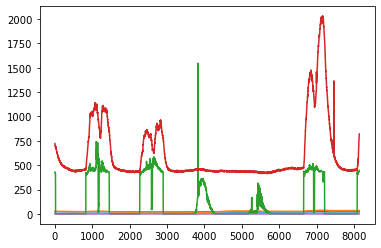

In [48]:
plt.plot(df_1)

## Reservoir Sampling

In [49]:

import random

def selectKItems(stream, n, k):
            
                    
            i=0;
            # index for elements
            # in stream[]

            # reservoir[] is the output
            # array. Initialize it with
            # first k elements from stream[]
            reservoir = [0]*k;
            for i in range(k):
                reservoir[i] = stream[i];

            # Iterate from the (k+1)th
            # element to nth element
            while(i < n):
                # Pick a random index
                # from 0 to i.
                j = random.randrange(i+1);

                # If the randomly picked
                # index is smaller than k,
                # then replace the element
                # present at the index
                # with new element from stream
                if(j < k):
                    reservoir[j] = stream[i];
                i+=1;
            return reservoir



In [50]:
n=10
stream=np.array(df_1['Light'])
t=selectKItems(stream, n, 1000)


In [51]:
from river.drift import PageHinkley
np.random.seed(12345)
ph = PageHinkley(threshold=10,min_instances=10)
# Update drift detector and verify if change is detected
for col in df_1:
  data_stream=[]
  a = np.array(df_low[col])
  b = np.array(df_high[col])
  data_stream = np.concatenate((a,b))
  for i, val in enumerate(data_stream):
     in_drift, in_warning = ph.update(val)
     if in_drift:
           print(f"Change detected at index {i} for column: {col} with input value: {val}")

Change detected at index 713 for column: Temperature with input value: 21.445
Change detected at index 765 for column: Temperature with input value: 22.1
Change detected at index 1872 for column: Temperature with input value: 21.315
Change detected at index 1957 for column: Temperature with input value: 21.79
Change detected at index 2156 for column: Temperature with input value: 22.1
Change detected at index 3319 for column: Temperature with input value: 21.0
Change detected at index 3363 for column: Temperature with input value: 21.89
Change detected at index 3421 for column: Temperature with input value: 22.7
Change detected at index 3509 for column: Temperature with input value: 23.1
Change detected at index 4072 for column: Temperature with input value: 23.1
Change detected at index 4412 for column: Temperature with input value: 22.7
Change detected at index 5572 for column: Temperature with input value: 20.625
Change detected at index 6691 for column: Temperature with input value

KeyError: 'Occupancy'

In [52]:
from river.drift import PageHinkley
np.random.seed(12345)
ph = PageHinkley(threshold=10,min_instances=10)
n = len(stream);

    
t=selectKItems(stream, n, 1000)
for i, val in enumerate(t):
    in_drift, in_warning = ph.update(val)
    if in_drift:
        print(f"Change detected at index {i} for column: {col} with input value: {val}")
   

Change detected at index 9 for column: Occupancy with input value: 419.0
Change detected at index 21 for column: Occupancy with input value: 512.0
Change detected at index 30 for column: Occupancy with input value: 0.0
Change detected at index 39 for column: Occupancy with input value: 0.0
Change detected at index 57 for column: Occupancy with input value: 444.0
Change detected at index 66 for column: Occupancy with input value: 528.0
Change detected at index 75 for column: Occupancy with input value: 206.25
Change detected at index 86 for column: Occupancy with input value: 426.0
Change detected at index 96 for column: Occupancy with input value: 433.0
Change detected at index 109 for column: Occupancy with input value: 464.0
Change detected at index 122 for column: Occupancy with input value: 522.0
Change detected at index 131 for column: Occupancy with input value: 0.0
Change detected at index 140 for column: Occupancy with input value: 508.5
Change detected at index 149 for column:

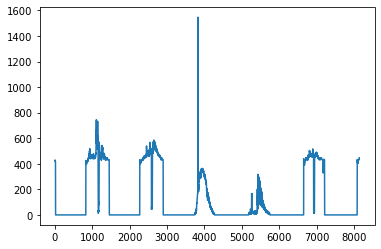

In [53]:
plt.plot(df_1['Light'])

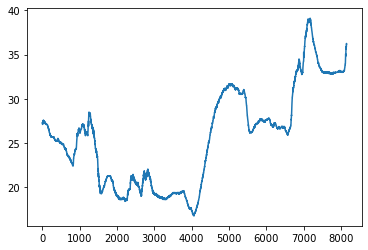

In [54]:
plt.plot(df_1['Humidity'])

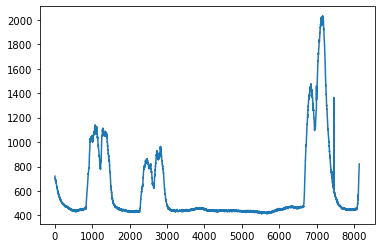

In [56]:
plt.plot(df_1['CO2'])

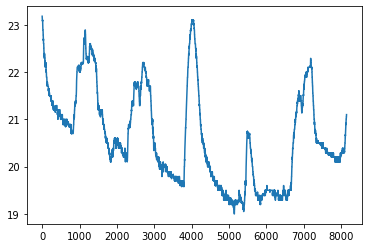

In [57]:
plt.plot(df_1['Temperature'])

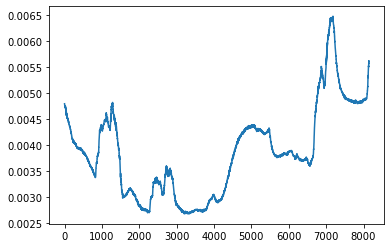

In [58]:
plt.plot(df_1['HumidityRatio'])

In [59]:
for i in range(1,1000,200):
    print(i)

1
201
401
601
801


In [60]:
k_page={}
c=0
from river.drift import PageHinkley
np.random.seed(12345)
ph = PageHinkley(threshold=10,min_instances=10)
# Update drift detector and verify if change is detected
for col in df_1:
      data_stream=[]
      a = np.array(df_low[col])
      b = np.array(df_high[col])
      data_stream = np.concatenate((a,b))
      

    
      for i, val in enumerate(data_stream):
         in_drift, in_warning = ph.update(val)
         if in_drift:
               c=c+1

               print(f"Change detected at index {i} for column: {col} with input value: {val}")
      k_page[col]=c
      c=0

Change detected at index 713 for column: Temperature with input value: 21.445
Change detected at index 765 for column: Temperature with input value: 22.1
Change detected at index 1872 for column: Temperature with input value: 21.315
Change detected at index 1957 for column: Temperature with input value: 21.79
Change detected at index 2156 for column: Temperature with input value: 22.1
Change detected at index 3319 for column: Temperature with input value: 21.0
Change detected at index 3363 for column: Temperature with input value: 21.89
Change detected at index 3421 for column: Temperature with input value: 22.7
Change detected at index 3509 for column: Temperature with input value: 23.1
Change detected at index 4072 for column: Temperature with input value: 23.1
Change detected at index 4412 for column: Temperature with input value: 22.7
Change detected at index 5572 for column: Temperature with input value: 20.625
Change detected at index 6691 for column: Temperature with input value

KeyError: 'Occupancy'

In [61]:
k

{'Temperature': 110, 'Humidity': 243, 'Light': 301, 'CO2': 359}

In [62]:
k_page

{'Temperature': 18,
 'Humidity': 33,
 'Light': 123,
 'CO2': 163,
 'HumidityRatio': 0}

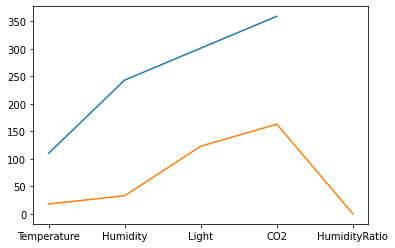

In [63]:
plt.plot(list(k.keys()), list(k.values()))
plt.plot(list(k_page.keys()), list(k_page.values()))

In [65]:
df['Occupancy'].unique()

array([1, 0], dtype=int64)